In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100


Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X =df.drop(columns=['Survived'])
y =df['Survived']

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [7]:
X_train['Age_imputed']= X_train['Age']
X_test['Age_imputed']= X_test['Age']

In [8]:
X_train.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


In [9]:
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed']=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

In [10]:
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed']=X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [11]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,6.0
493,71.0,49.5042,71.0
527,NaN,221.7792,47.0


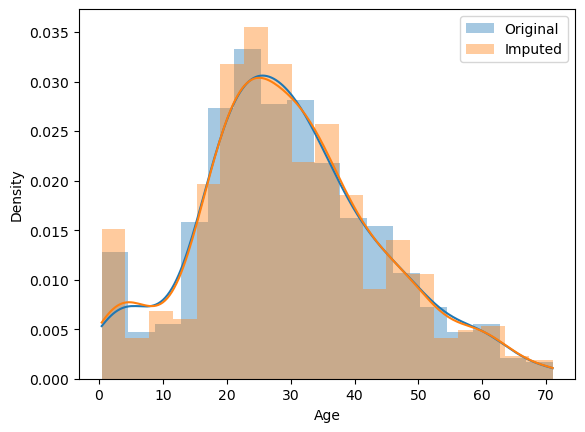

In [12]:
sns.histplot(X_train['Age'],kde=True,label='Original',edgecolor=None,alpha=0.4 ,stat='density')
sns.histplot(X_train['Age_imputed'],kde=True,label='Imputed',edgecolor=None,alpha=0.4, stat='density')

plt.legend()
plt.show()

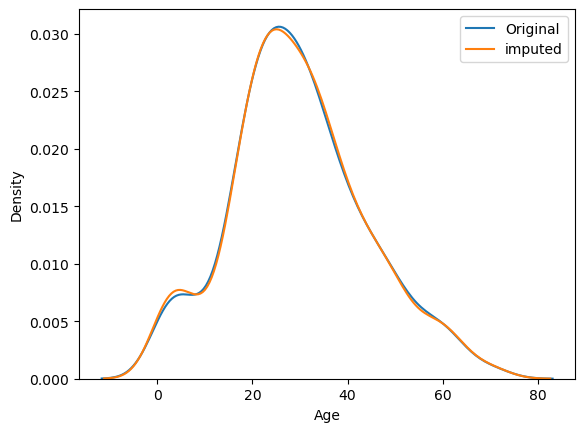

In [13]:
sns.kdeplot(X_train['Age'],label='Original')
sns.kdeplot(X_train['Age_imputed'],label='imputed')


plt.legend()
plt.show()

In [14]:
print("Original Variance: ",X_train['Age'].var())
print("Variance after random inputation: ",X_train['Age_imputed'].var())

Original Variance:  204.3495133904614
Variance after random inputation:  206.30980816621621


In [15]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,58.096630
Age,71.512440,204.349513,204.349513
Age_imputed,58.096630,204.349513,206.309808


<Axes: >

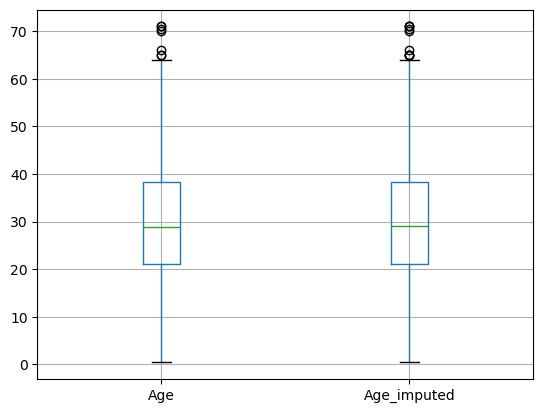

In [16]:
X_train[['Age','Age_imputed']].boxplot()

In [17]:
X_train['Age'].dropna().sample(10,random_state=42)
# random state helps in fixing the random valuea

323    22.0
807    18.0
25     38.0
561    40.0
820    52.0
350    23.0
890    32.0
86     16.0
823    27.0
489     9.0
Name: Age, dtype: float64

In [18]:
data =pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [19]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [20]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [21]:
X=data
y=data['SalePrice']

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [23]:
X_train['GarageQual_imputed']= X_train['GarageQual']
X_test['GarageQual_imputed']= X_test['GarageQual']

X_train['FireplaceQu_imputed']= X_train['FireplaceQu']
X_test['FireplaceQu_imputed']= X_test['FireplaceQu']

In [24]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1351,Gd,TA,171000,TA,Gd
1224,Gd,TA,184000,TA,Gd
542,TA,TA,213250,TA,TA
1126,TA,TA,174000,TA,TA
784,Gd,NaN,128000,NaN,Gd


In [25]:
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed']=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values

X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed']=X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

In [26]:
X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed']=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed']=X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [27]:
temp =pd.concat([
    X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts()/len(X_train),
],axis=1)

temp.columns=['original','imputed']

In [28]:
temp

,original,imputed
TA,0.951043,0.951199
Fa,0.037171,0.035959
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [29]:
temp2 =pd.concat([
    X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts()/len(X_train),
],axis=1)

temp2.columns=['original','imputed']

In [30]:
temp2

,original,imputed
Gd,0.494272,0.495719
TA,0.412439,0.410959
Fa,0.040917,0.040240
Po,0.027823,0.027397
Ex,0.024550,0.025685


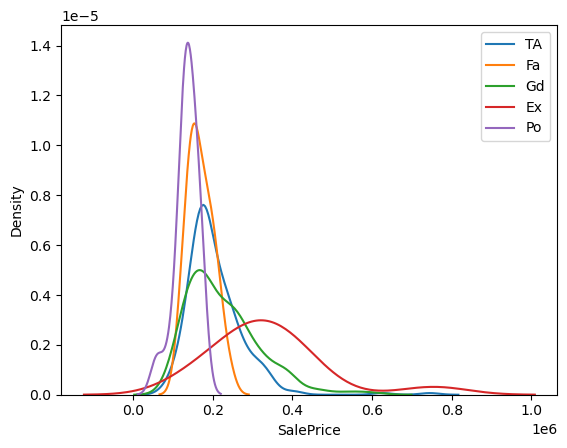

In [31]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()

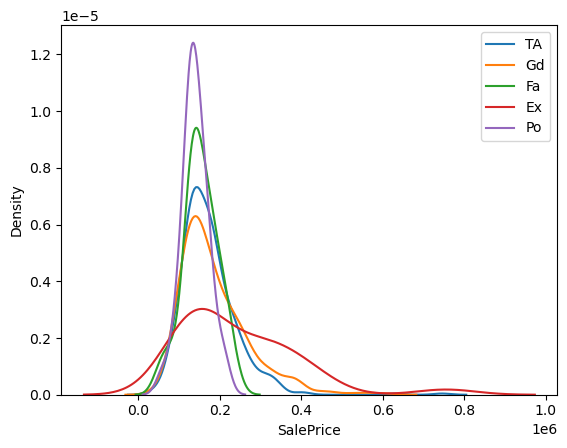

In [32]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)
plt.legend()
plt.show()

due to large number of missing values this random sample imputation is causing changes in distribution of data which isn't good